In [5]:
# Research Question: How does physical activity level impact students' confidence in coping with stress and their academic performance?

# Survey was given to first-year incoming freshmen students at Truman State University. In this research, I attempt to answer the above question. 

In [6]:
# Load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load data

data = pd.read_csv("PreTest_ReadyForRStudio.csv")

In [8]:
# Basic full data observations

data.describe()

,Year,Over_18,Full_Time,First_Year_Student,Age,Gender,Sexual_Orientation,Race,Family_Grad_History,Gross_Family_Income,...,Track_Spending,Save_Money,Financial_Anxiety,Career_Financial_Impact,Financial_Obligations_Overwhelming,Job_Necessity,Parent_Financial_Support,Future_Financial_Plan,Contribution,Financial_Score
count,1075.000000,1074.0,1075.0,1074.000000,1074.000000,1058.000000,1059.000000,1071.000000,1070.000000,1054.000000,...,1074.000000,1075.000000,1074.000000,1075.000000,1075.000000,1074.000000,1075.000000,1073.000000,1073.000000,1075.000000
mean,2.399070,1.0,1.0,1.022346,1.163873,1.950851,3.595845,1.455649,1.871963,2.854839,...,2.593110,3.546047,2.187151,3.308837,2.543256,2.801676,3.372093,2.893756,2.809879,29.197209
std,1.153006,0.0,0.0,0.165708,0.502703,0.907993,1.425869,1.439640,0.570116,1.081130,...,1.010287,0.627186,0.977559,0.734534,1.050290,1.074467,0.835191,0.888299,0.884788,4.380016
min,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,1.000000,1.0,1.0,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,...,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,26.000000
50%,2.000000,1.0,1.0,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.000000,...,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,29.000000
75%,3.000000,1.0,1.0,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,4.000000,...,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,32.000000
max,4.000000,1.0,1.0,3.000000,7.000000,7.000000,15.000000,8.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000


In [9]:
# Basic data observations honed in on the Physical_Activity_Scress variable. This is an essential variable for this research.
# Note: The Physical_Activity_Stress variable was an answer to the following question on a scale from 1-4: 
# I use physical activity as a coping mechanism to help deal with stress

data["Physical_Activity_Stress"].describe()

count    1074.000000
mean        2.675047
std         1.010472
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Physical_Activity_Stress, dtype: float64

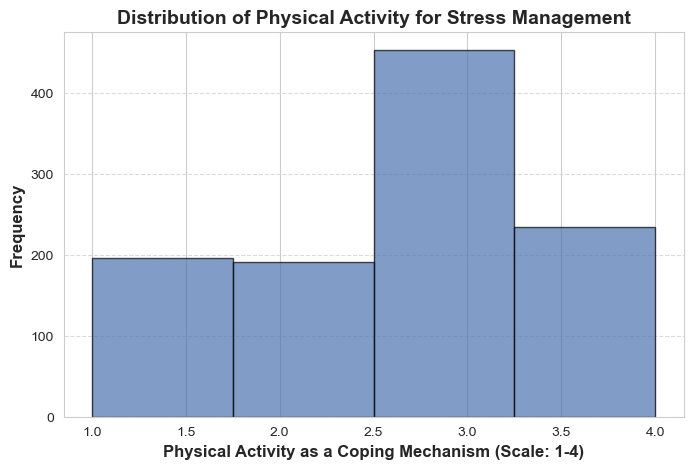

In [10]:
# Basic histogram of the Physical_Activity_Stress variable

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.hist(data["Physical_Activity_Stress"], bins=4, color="#4C72B0", edgecolor="black", alpha=0.7)
plt.xlabel('Physical Activity as a Coping Mechanism (Scale: 1-4)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Physical Activity for Stress Management', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

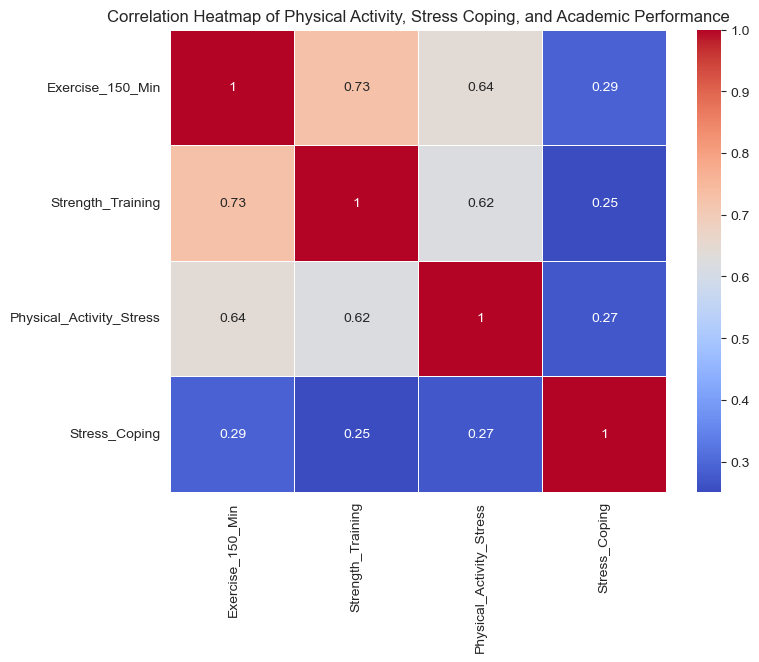

In [11]:
# Correlation heatmap of physical-related variables and Stress_Coping

corr = data[['Exercise_150_Min', 'Strength_Training', 'Physical_Activity_Stress', 'Stress_Coping']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Physical Activity, Stress Coping, and Academic Performance")
plt.show()

# Physical_Activity_Stress, Exercise_150_Min, and Strength_Training are positively correlated (≥0.6), which is expected since these variables all relate to physical activity.
# Stress_Coping has a slightly positive correlation (~0.27-0.29) with physical activity variables, indicating that students who engage in more physical activity tend to feel more confident in coping with stress.
# Study_Skills has a slight correlation (~0.23-0.28) with physical activity, but it still suggests a potential positive effect of exercise on academic confidence.

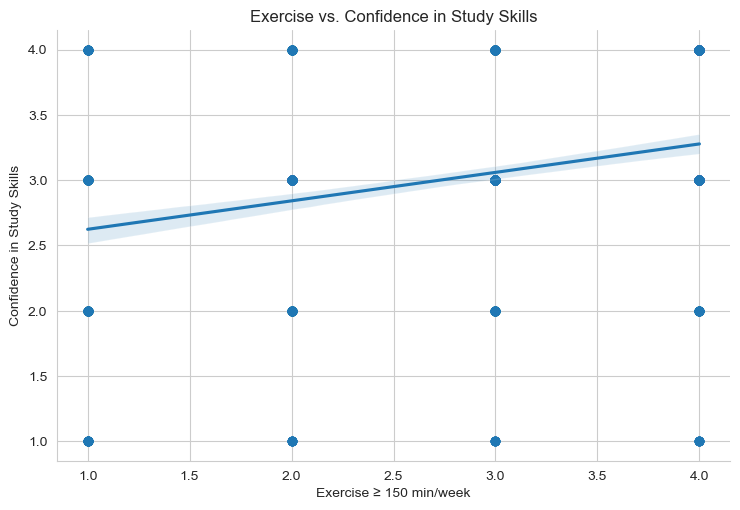

In [12]:
# Basic lmplot of Exercise_150_Min vs Study_Skills

sns.lmplot(x = "Exercise_150_Min", y = "Study_Skills", data = data, aspect = 1.5)
plt.xlabel("Exercise ≥ 150 min/week")
plt.ylabel("Confidence in Study Skills")
plt.title("Exercise vs. Confidence in Study Skills")
plt.show()

# The regression line shows a positive correlation, meaning students who exercise more tend to have greater confidence in their study skills.
# Although the correlation is not very strong, the trend suggests that regular exercise could be linked to improved academic confidence.

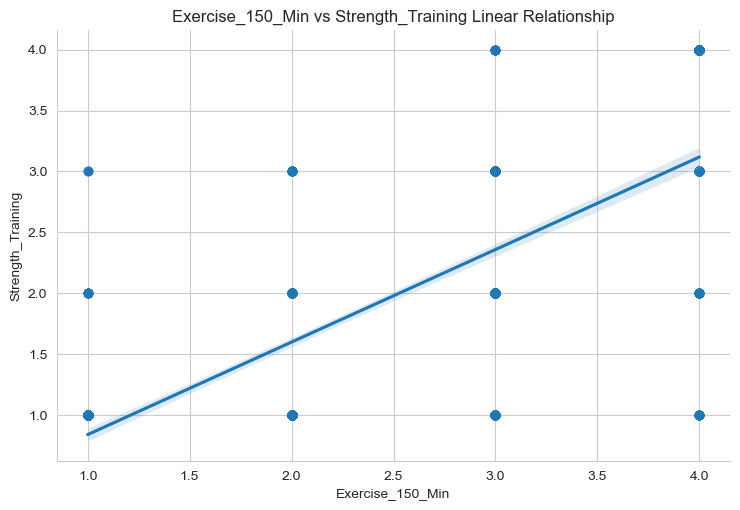

In [13]:
# Before, we had used Exercise_150_Min and Study_Skills, with a linear correlation of 0.24. 
# Now let's try something with a stronger linear coefficient, say Exercise_150_Min and Strength_Training (coeff ~ 0.73)

sns.lmplot(x = 'Exercise_150_Min', y = 'Strength_Training', data = data, aspect = 1.5)
plt.xlabel("Exercise_150_Min")
plt.ylabel("Strength_Training")
plt.title("Exercise_150_Min vs Strength_Training Linear Relationship")
plt.show()

# Now we have a stronger linear relationship. This shows that there is a significant relationship between exercising over 150 minutes and 
# engaging in strength training. 

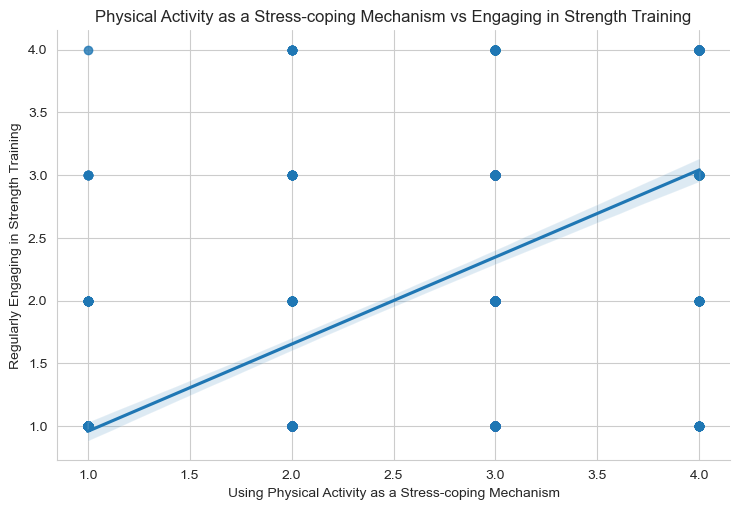

In [14]:
# From the correlation heatmap, we can tell that using physical activity as a stress-coping mechanism typically leads to other strength-training
# related observations. For instance, engaging in strength training or exercising over 150 minutes a week. 

# linear plot of Physical_Activity_Stress vs Strength Training

sns.lmplot(x = 'Physical_Activity_Stress', y = 'Strength_Training', data = data, aspect = 1.5)
plt.xlabel("Using Physical Activity as a Stress-coping Mechanism")
plt.ylabel("Regularly Engaging in Strength Training")
plt.title("Physical Activity as a Stress-coping Mechanism vs Engaging in Strength Training")
plt.show()

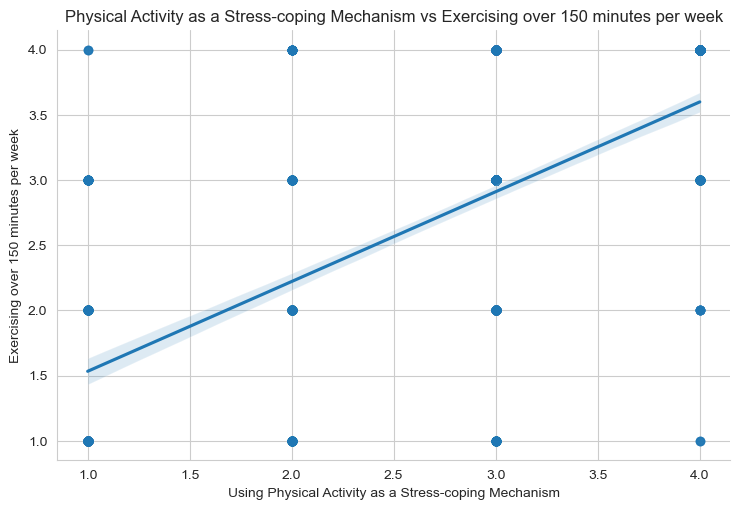

In [15]:
# Basic lmplot of Physical_Activity_Stress vs Exercise_150_Min

sns.lmplot(x = 'Physical_Activity_Stress', y = 'Exercise_150_Min', data = data, aspect = 1.5)
plt.xlabel("Using Physical Activity as a Stress-coping Mechanism")
plt.ylabel("Exercising over 150 minutes per week")
plt.title("Physical Activity as a Stress-coping Mechanism vs Exercising over 150 minutes per week")
plt.show()

In [16]:
# SIMPLE LINEAR REGRESSION: Does Physical Activity Affect Stress Coping?

# impute by the mean
X_stress = data[['Physical_Activity_Stress']].replace([np.inf, -np.inf], np.nan).fillna(data[['Physical_Activity_Stress']].mean())
y_stress = data['Stress_Coping'].fillna(data['Stress_Coping'].mean()) 

X_stress = sm.add_constant(X_stress)  # Add constant term

# fit the model
model_stress = sm.OLS(y_stress, X_stress).fit()

# Display summary
print(model_stress.summary())

# The output is statistically slightly significant. The R^2 indicates only 7% of the variability is explained by the model.
# Physical_Activity_Stress has a significant positive relationship with Stress_Coping
# More variables will be needed to create a stronger model.

                            OLS Regression Results                            
Dep. Variable:          Stress_Coping   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     84.90
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           1.61e-19
Time:                        12:08:49   Log-Likelihood:                -1186.0
No. Observations:                1075   AIC:                             2376.
Df Residuals:                    1073   BIC:                             2386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [17]:
# SIMPLE LINEAR REGRESSION: Does Stress Coping Affect Academic Performance?

X_intellectual = data[['Stress_Coping']]  # Independent variable
y_intellectual = data['Intellectual_Score']  # Dependent variable
X_intellectual = sm.add_constant(X_intellectual)  # regression constant

# fit regression model
model_intellectual = sm.OLS(y_intellectual, X_intellectual).fit()

print(model_intellectual.summary())

# The output is statistically significant. The R^2 indicates that approximately 12.8% of the variability in Intellectual_Score is explained by the model.
# Stress_Coping has a significant positive relationship with Intellectual_Score.
# More variables will be needed to create a stronger model.

                            OLS Regression Results                            
Dep. Variable:     Intellectual_Score   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     157.0
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           1.01e-33
Time:                        12:08:49   Log-Likelihood:                -2849.4
No. Observations:                1075   AIC:                             5703.
Df Residuals:                    1073   BIC:                             5713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.0532      0.428     65.557

In [18]:
# Mediation analysis is used to understand the mechanism through which an independent variable
# (Physical_Activity_Stress) affects a dependent variable (Intellectual_Score) through a mediator (Stress_Coping).
# In this analysis, we will examine whether Stress_Coping mediates the relationship between Physical_Activity_Stress and Intellectual_Score.
# For reference, Physical Activity -> Stress Coping -> Intellectual Score

# Impute missing values with the mean for relevant columns
data['Physical_Activity_Stress'] = data['Physical_Activity_Stress'].fillna(data['Physical_Activity_Stress'].mean())
data['Stress_Coping'] = data['Stress_Coping'].fillna(data['Stress_Coping'].mean())
data['Intellectual_Score'] = data['Intellectual_Score'].fillna(data['Intellectual_Score'].mean())

# Residuals for indirect effect (now with imputed data)
X_stress = data[['Physical_Activity_Stress']]
X_stress = sm.add_constant(X_stress)
model_stress = sm.OLS(data['Stress_Coping'], X_stress).fit()

# Add residuals to the dataframe for mediation analysis
data['Residual_Stress_Coping'] = model_stress.resid

# Independent variables for mediation model
X_mediation = data[['Physical_Activity_Stress', 'Residual_Stress_Coping']]
X_mediation = sm.add_constant(X_mediation)

# Fit mediation model
model_mediation = sm.OLS(data['Intellectual_Score'], X_mediation).fit()

# Print results
print(model_mediation.summary())

# The output is statistically significant. The R^2 indicates that approximately 13.9% of the variability in Intellectual_Score is explained by the model.
# Both Physical_Activity_Stress and Residual_Stress_Coping have significant positive relationships with Intellectual_Score.
# More variables will be needed to create a stronger model.


                            OLS Regression Results                            
Dep. Variable:     Intellectual_Score   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     86.82
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           1.13e-35
Time:                        12:08:49   Log-Likelihood:                -2842.2
No. Observations:                1075   AIC:                             5690.
Df Residuals:                    1072   BIC:                             5705.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [19]:
# ---- MULTIVARIATE PREDICTIVE MODELING -----

# Define predictive variables

predictor_variables = [
    "Study_Skills", "Best_Learning_Pathway", "Problem_Solving",
    "Different_Viewpoints", "Opposing_Viewpoint_Interaction", "Learn_From_Others",
    "Physical_Score", "Relational_Score", "Current_Events",
    "Learn_New_Things", "Creative_Pursuits", "Challenges_Growth"   
]

# Data dictionary:

# Study_Skills: I am confident that I have developed effective study skills/habits and am prepared for my coursework
# Best_Learning_Pathway: I typically am able to use my best pathway to learn
# Problem_Solving: I am confident in my ability to solve problems and finish tasks that I start
# Different_Viewpoints: I am interested in learning more about viewpoints different from my own
# Opposing_Viewpoint_Interaction: I regularly engage in conversations with peers/family having opposing viewpoints
# Learn_From_Others: I typically surround myself with others who can help me learn
# Physical_Score: The sum of all responses to physical-related questions
# Relational_Score: The sum of all responses to relational-related questions
# Credit_Hours: How many credit hours will you be taking your first semester?
# Extracurriculars: Do you anticipate being involved in an extracurricular activity this fall? Check all that apply

X = data[predictor_variables] 
y = data["Intellectual_Score"] # Attempting to predict Intellectual Score (this is our closest thing to Academic Performance)

# Impute missing values with the mean, if any

X = X.fillna(X.mean())
y = y.fillna(y.mean())

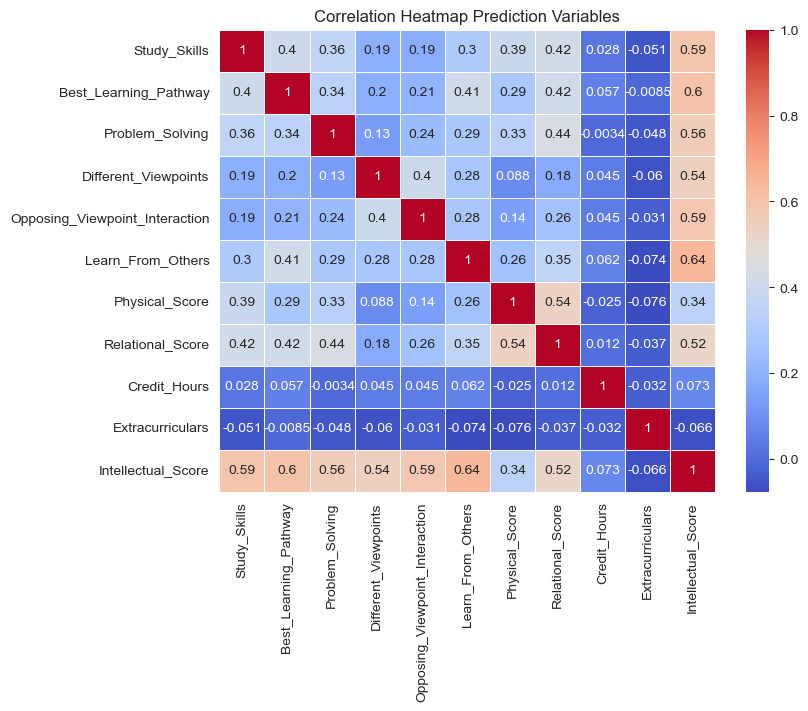

In [20]:
# Examing correlation between our prediction variables

corr = data[["Study_Skills", "Best_Learning_Pathway", "Problem_Solving",
    "Different_Viewpoints", "Opposing_Viewpoint_Interaction", "Learn_From_Others",
    "Physical_Score", "Relational_Score", "Credit_Hours", "Extracurriculars", 'Intellectual_Score']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap Prediction Variables")
plt.show()

In [21]:
# Splitting testing and training data, also applying feature scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Linear regression model

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear_reg = linear_reg.predict(X_test_scaled)

# Examine the mean squared error and R^2 value

print("MSE:", mean_squared_error(y_test, y_pred_linear_reg))
print("R² Score:", r2_score(y_test, y_pred_linear_reg))

MSE: 0.1454428750765773
R² Score: 0.9881081642644878


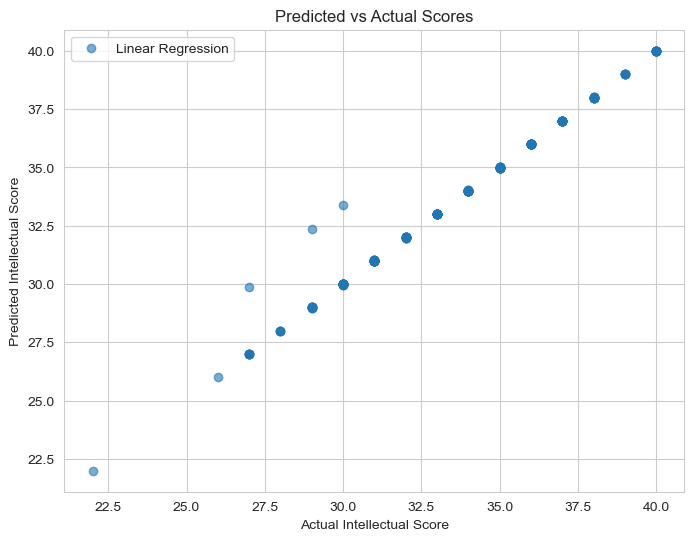

In [23]:
# Visualizing the linear regression model

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear_reg, alpha=0.6, label="Linear Regression")
plt.xlabel("Actual Intellectual Score")
plt.ylabel("Predicted Intellectual Score")
plt.title("Predicted vs Actual Scores")
plt.legend()
plt.show()

In [24]:
# Random Forest model

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

MSE: 0.7406283720930233
R² Score: 0.9394440536371902


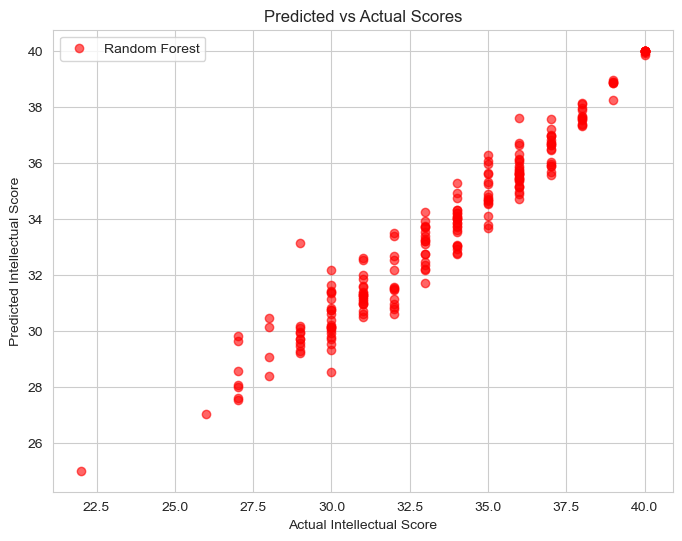

In [25]:
# Random Forest model visualization

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color='red')
plt.xlabel("Actual Intellectual Score")
plt.ylabel("Predicted Intellectual Score")
plt.title("Predicted vs Actual Scores")
plt.legend()
plt.show()

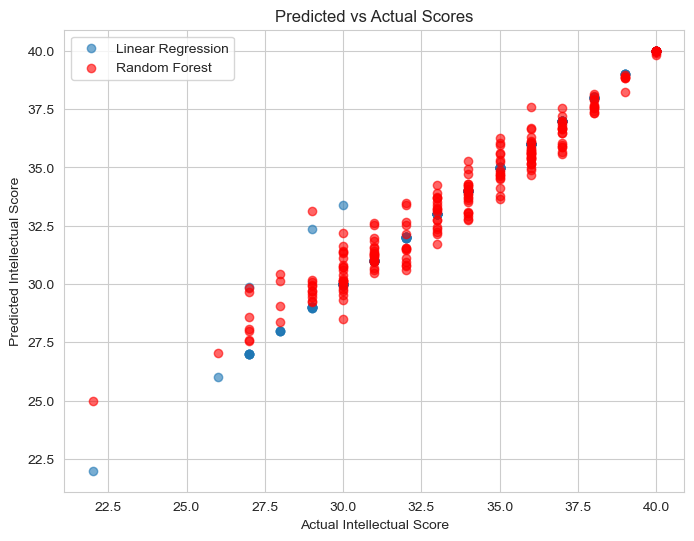

In [26]:
# The output is similar to the output of the linear regression model. It seems that the linear regression model performed a slight bit 
# better than the random forest model. 

# Let's visualize both of them together

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear_reg, alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color='red')
plt.xlabel("Actual Intellectual Score")
plt.ylabel("Predicted Intellectual Score")
plt.title("Predicted vs Actual Scores")
plt.legend()
plt.show()

In [28]:
# Support Vector Regression (SVR)

svr_reg = SVR(kernel='rbf') # using a radial-based function (rbf) kernel, we can fit our data with a non-linear curve.
svr_reg.fit(X_train_scaled, y_train)
y_pred_svr = svr_reg.predict(X_test_scaled)

print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR R^2 Score:", r2_score(y_test, y_pred_svr))

SVR MSE: 0.2957774189123672
SVR R^2 Score: 0.9758163713545421


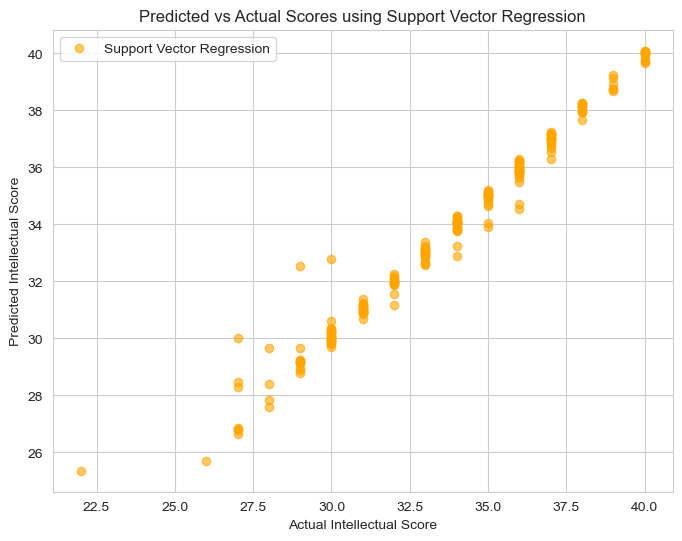

In [29]:
# Support Vector Regression (SVR) visualization 

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr, alpha = 0.6, label = "Support Vector Regression", color = 'orange')
plt.xlabel("Actual Intellectual Score")
plt.ylabel("Predicted Intellectual Score")
plt.title("Predicted vs Actual Scores using Support Vector Regression")
plt.legend()
plt.show()

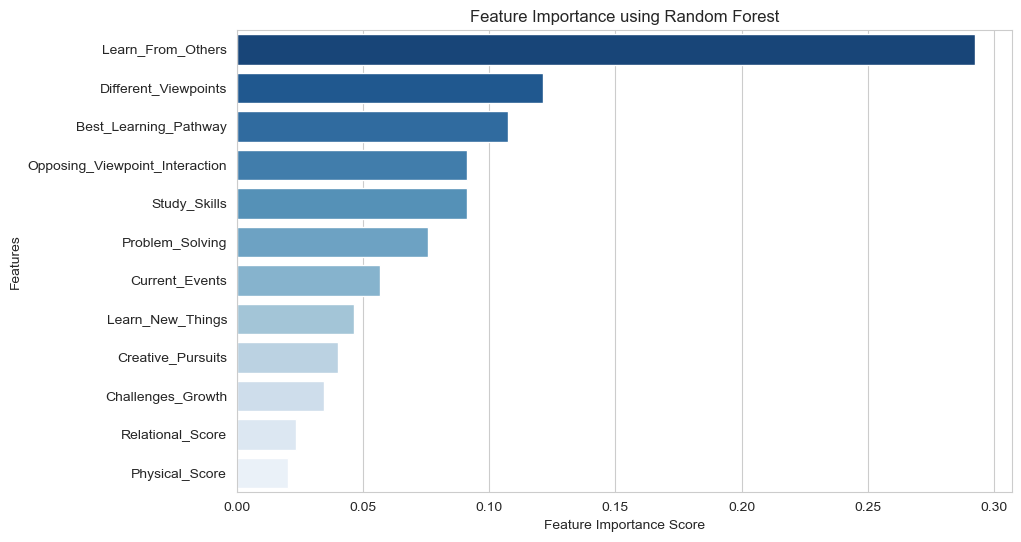

In [27]:
# Feature importance using random forests for Intellectual_Score

feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': predictor_variables, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_r", hue='Feature', dodge=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.legend([],[], frameon=False)  # This removes the unnecessary legend and warning
plt.show()

C:\Users\wolzi\AppData\Local\Temp\ipykernel_9556\1879243664.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_15_importance_df, palette="Blues_r")


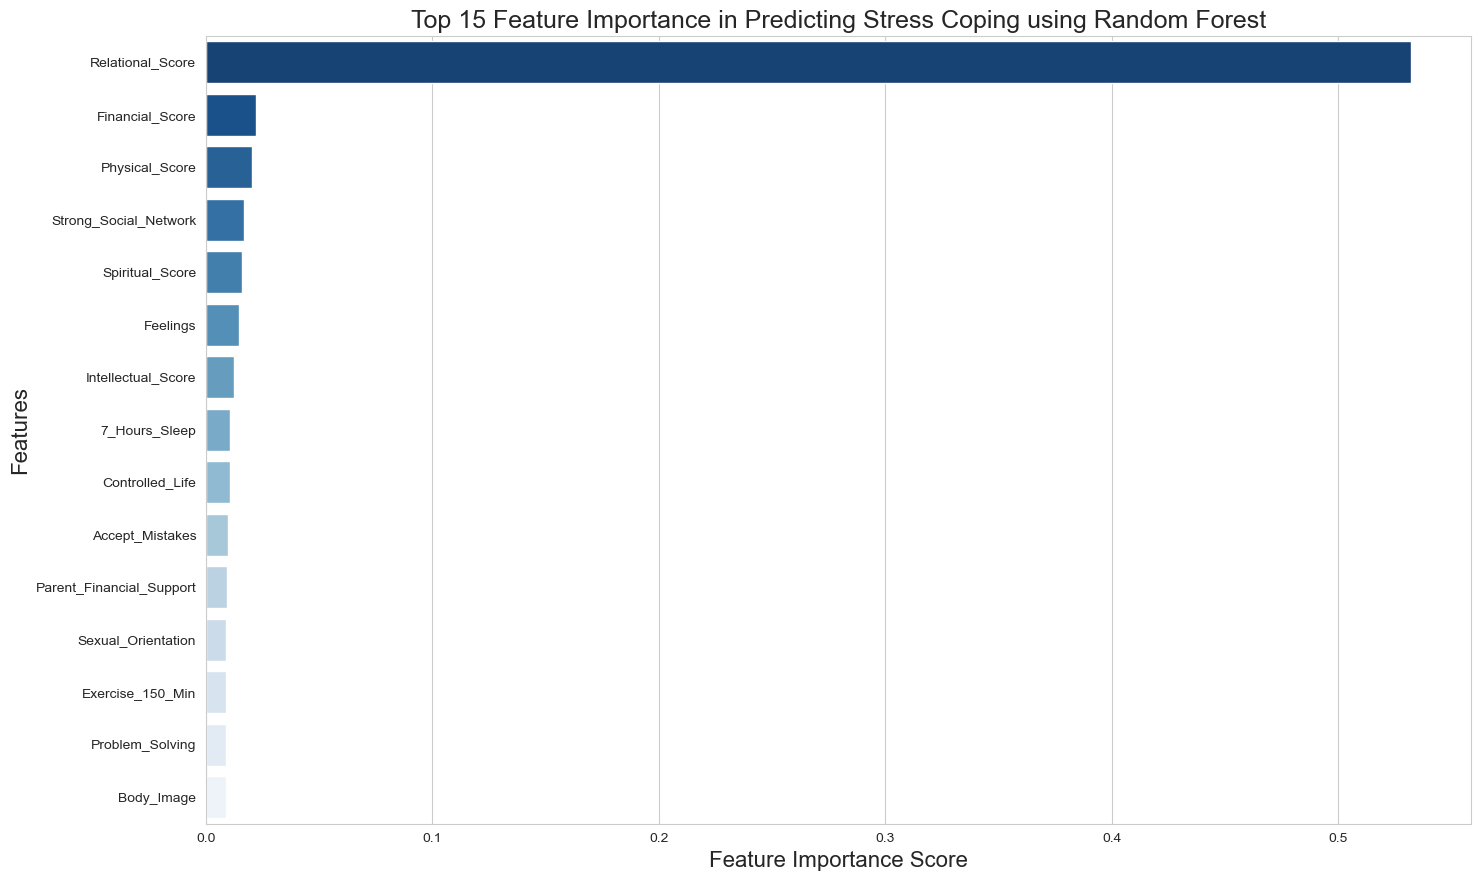

In [31]:
# Random Forest importance plot for stress coping

df_rf = pd.read_csv("PreTest_ReadyForRStudio.csv")  # Replace with actual dataset file

X = df_rf.drop(columns=["Stress_Coping"])
y = df_rf["Stress_Coping"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Limit to top 15 most important features
top_15_importance_df = importance_df.head(15)

plt.figure(figsize=(16,10)) 
sns.barplot(x="Importance", y="Feature", data=top_15_importance_df, palette="Blues_r")

plt.xlabel("Feature Importance Score", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Top 15 Feature Importance in Predicting Stress Coping using Random Forest", fontsize=18)

plt.tight_layout(pad=5.0) 

plt.show()

